In [1]:
from PIL import Image 
from IPython.display import display 
import os
import os.path, sys
import re
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Define a function to Import Image class from PIL module 
# Opens a image in RGB mode 
pil_im=Image.open('/Users/xiezhuoya/Downloads/picturesbinary/pictures0030.jpg') 
print(pil_im)




<PIL.JpegImagePlugin.JpegImageFile image mode=L size=3048x3000 at 0x106192588>


In [3]:
## specify the path for the folder where you are gonna store all your cropped images, and other figures in
path = '/Users/xiezhuoya/Downloads/cropsequence30/'


In [50]:


##define a function to crop an image
def crop(file,l,x1,y1,m,n):
    fullpath = os.path.join(path,str(m) +'-'+ str(n)+'.jpg')         #corrected
    
        #f, e = os.path.splitext(fullpath)
    filecrop = file.crop((x1, y1, x1+l, y1+l)) #corrected
    filecrop.save(fullpath)
##test



In [51]:
##define a fucntion to produce 2-d sequences of cropped images and save them in a specific directory
##i,j denote the i-th(along x direction), j-th(along y direction) image 
def cropsequence(file,l,d):
    for i in range(1,(3000-l)//d + 2):
        for j in range(1,(3000-l)//d + 2):
            crop(file,l,(i-1)*d,(j-1)*d,i,j)
## let l=600 , d= 60, it will create 41*41 images, the window moved along each direction for 40 steps
cropsequence(pil_im,600,60)

In [4]:
##define a function to return a zero numpy array of dimension N*N
def returnnp(l,d):
    N=int((3000-l)/d+1)
    g=np.zeros((N,N),dtype=float)
    return g
returnnp(600,60)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
import re
##extract all the mean orientation data from a messy .txt file that Cytospectre produced
## play with one example
mylines = []
m = []
y = [] ## an empty list to store mean orientation values for each image
with open(path + 'analysisresult.txt', 'rb') as myfile:
    for myline in myfile:
        mylines.append(myline)
c=mylines[4].decode('utf-8')
print(mylines[4])
b=c.find("Detail")
print(b)



b'1-4.jpg\t/Users/xiezhuoya/Downloads/cropsequence30/1-4.jpg\t1\tMixed\t115.884400575995\t0.933509858418214\t1.36638929915176\t-0.024410027759332\t0.00362014630360541\t0.889762228228767\t0.325921657800891\t0.154622985673214\t1.3754268036663\tDetail\t127.098260406019\t0.221067099770942\t0.66493172547404\t-0.0241827658002996\t0.295363744511009\t4.83823205706152\t4.69297665483993\t4.15846416110348\t0.861877355677002\t1.29573848071032\t\t\t\t\t\t\t\t\t\t\t1296\t100\tDisabled\tCombined\tYes\tYes\tBalanced\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tDefault\t0.1\t0.05\t10\t1\t10\t0.5\n'
227


In [7]:
##use the similar idea to detect wavelength in  an txt file which only contain one image
mylines1 = []
 ## an empty list to store wavelength values for each image
with open(path + 'analysisresult.txt', 'rb') as myfile:
    for myline in myfile:
        mylines1.append(myline)
c=mylines1[25].decode('utf-8')
print(c)
indices = [i for i, x in enumerate(c) if x == "\t"]
print(indices)
t=indices[20]
wavelength=[]
print(t)
for i in range(1,14):
    wavelength.append(c[i+t])
print(wavelength)
wavelength[0:13] = [''.join(wavelength[0:13])]  
wavelength


##now try to extract mode wavelength 6.0779...from the piece mylines1[1]
#searchword("\t")
##suceed! exactly the right number 
##now lets make a function to officlly process large amount of data



1-25.jpg	/Users/xiezhuoya/Downloads/cropsequence30/1-25.jpg	1	Mixed	106.30168876058	0.853615307547419	1.30661035320207	0.0496273448873827	0.0692651100576995	1.06180989615785	0.341990382796938	0.154622985673214	1.58950189139543	Detail	111.25584430282	0.0901724370774795	0.42467031230704	0.00699060640323975	0.673911924595382	5.33221338320091	5.30085955327531	4.93825209864752	0.8448106533324	3.17151123945647											1296	100	Disabled	Combined	Yes	Yes	Balanced	NaN	NaN	NaN	NaN	NaN	NaN	Default	0.1	0.05	10	1	10	0.5

[8, 59, 61, 67, 83, 101, 118, 137, 156, 173, 191, 209, 226, 233, 249, 268, 285, 305, 323, 340, 357, 374, 390, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 422, 426, 435, 444, 448, 452, 461, 465, 469, 473, 477, 481, 485, 493, 497, 502, 505, 507, 510]
357
['4', '.', '9', '3', '8', '2', '5', '2', '0', '9', '8', '6', '4']


['4.93825209864']

1681


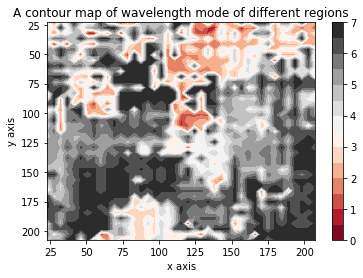

In [8]:
mylines2=[]
wavelength=[]
wavelist=[] ##an empty list to store indexes for the 21-th "\t" in the corresponding data piece for each image
##n is number of images in one dimension
def wavelengthlist(path,l,d):
    with open(path, 'rb') as myfile:
        for myline in myfile:
            mylines2.append(myline)
    for i in range(1,int((3000-l)/d+1)**2+1):
        c=mylines2[i].decode('utf-8')
        indices = [j for j, x in enumerate(c) if x == "\t"]
        t=indices[20]
        for k in range(1,14):
            wavelength.append(c[k+t])
        wavelength[(i-1):13+(i-1)] = [''.join(wavelength[(i-1):13+(i-1)])]
    return wavelength
   
##call the function to return wavelength values for a specific file
a=wavelengthlist(path + 'analysisresult.txt',600,60)
print(len(a))
##extraction succeed!
##turn all string type elements to floats
##N=(3000-l)/d + 1
g=returnnp(600,60)
def getwavearray(originarray,l,d):
    N=int((3000-l)/d+1)
    for i in range(0,N):
            for j in range(0,N):
                g[i][j]=originarray[i*N+j]
    return np.transpose(g)
getwavearray(a,600,60)
###define a function to plot out the color map of wavelength over spacial coordinates
def colormap(originarray,l,d,p):
    X = np.arange(l*0.5*p, (3000.-0.5*l+d)*p,d*p)
    Y = np.arange(l*0.5*p, (3000.-0.5*l+d)*p,d*p)
    xx, yy = np.meshgrid(X, Y)
    Z = getwavearray(originarray,l,d)
    #contours = plt.contour(xx, yy, Z, 6, colors='black')
    #plt.clabel(contours, inline=1, fontsize=8)
    #plt.gca().invert_yaxis()
    #plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',cmap='RdGy', alpha=0.2)
    #plt.colorbar()
    plt.contourf(xx, yy, Z, 15, cmap='RdGy', linestyles='dashed',alpha=1)
    ##the number after Z was set to 15 in the case of l=1000, d=100
    # Add title and axis names
    plt.title('A contour map of wavelength mode of different regions')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.savefig(path + 'wavelength_l=600_d=60.jpg')

colormap(a,600,60,0.076805)


In [809]:
plt.contourf?

In [9]:
#define a function to extract all mean orientation data from the .txt file given the number of images being processed
y=[]
m=[]
def returnorientation(l,d):        ## N is the number of images N=(3000-l)/d + 1 along one direction
    for i in range(1,int((3000-l)/d+1)**2+1):
        c=mylines[i].decode('utf-8')
        b=c.find("Detail")
        for j in range(b+7, b+17):  ## 9digits + '.'
            m.append(c[j])
        m[(i-1):10+(i-1)] = [''.join(m[(i-1):10+(i-1)])]
        y.append(float(m[i-1]))
    return y

k=returnorientation(600,60)
type(k)

list

In [10]:
##define a function to turn the resulting orientation data list to a 2d array
##argument k is the resulting orientation list we obtained from the above section
def orientationarray(l,d):
    N=int((3000-l)/d+1)
    g=returnnp(l,d)
    for i in range(0,N):
        for j in range(0,N):
            g[i][j]=k[i*N+j]
    return np.radians(np.transpose(g))
z=orientationarray(600,60)

In [114]:
a=np.array([[1, 2], [3, 4],[5,6]])
a[0][1]

2

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np


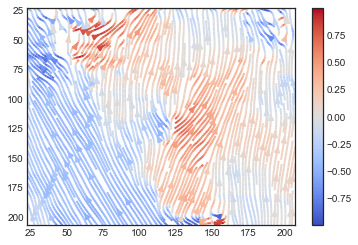

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import plotly.figure_factory as ff
##define a function to plot out the quiver plot of the orientation versus spatial coordinates
def quiver(l,d,p):   ###p=0.076805 meaning the actual length corresponding to per pixel in the image, 0.5 means the center of the window
    X = np.arange(l*0.5*p, (3000.-0.5*l+d)*p,d*p)
    Y = np.arange(l*0.5*p, (3000.-0.5*l+d)*p,d*p)
    xx, yy = np.meshgrid(X, Y)
##call orientation array in radians we obtained， the length of the arrow was 80 for the case : l=1000, d=100
##create quiver plot figure
    z=orientationarray(l,d)
    u=1.*np.cos(z)
    v=1.*np.sin(-z)
    fig = ff.create_quiver(xx, yy, 50.*u, 50.*v)
    fig.update_yaxes(autorange="reversed")
    fullpath=path + 'quiverplot.png'
    fig.show()
    
    # Create streamline figure
    fig1 = ff.create_streamline(X, Y, u, v, arrow_scale= 4)
    fig1.update_yaxes(autorange="reversed")
    fig1.show()
    ##create another type of streamline figure
    plt.streamplot(X, Y, u, v, color=u, linewidth=2, density=3,cmap=plt.cm.coolwarm)
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.savefig(path + "streamlinecolor.png")

a=quiver(600,60,0.076805)
a

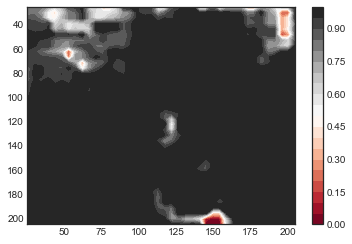

In [21]:
##Compute the degree of spin alignment
h=np.zeros((40, 40))
def spinalign(l,d,p):
    z=orientationarray(600,60)
    for i in range(0,40):
        for j in range(0,40):
            h[i][j]=0.25*(np.cos(z[i][j]-z[i+1][j])+np.cos(z[i][j]-z[i][j+1])+np.cos(z[i+1][j]-z[i+1][j+1])+np.cos(z[i][j+1]-z[i+1][j+1]))
    X = np.arange((l+d)*0.5*p, (3000.-0.5*l+0.5*d)*p,d*p)
    Y = np.arange((l+d)*0.5*p, (3000.-0.5*l+0.5*d)*p,d*p)
    xx, yy = np.meshgrid(X, Y)
    plt.contourf(xx, yy, h, 20, cmap='RdGy', linestyles='dashed',alpha=1)
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.savefig(path + 'spinalignment.jpg')
spinalign(600,60,0.076805)